# Importación de las librerias del CSV y limpieza del mismo.

In [ ]:
import pandas as pd
import re, string
import numpy as np
import nltk
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
data_music = pd.read_csv("df_lyrics.csv")

# Remove leading and trailing spaces from column names
data_music.columns = data_music.columns.str.strip()

data_music.head()

,Artist,Song,Lyrics,Genre
0,Britney Spears,...Baby One More Time,"Oh, baby, baby Oh, baby, baby Oh, baby, baby...",Pop
1,Britney Spears,Toxic,"Baby, can't you see I'm calling? A guy like y...",Pop
2,Britney Spears,Work Bitch,You wanna? You wanna? You want a hot body? Y...,Pop
3,Britney Spears,Oops!... I Did It Again,"Mmm, yeah Yeah, yeah, yeah, yeah, yeah, yeah ...",Pop
4,Britney Spears,If U Seek Amy,"La, la, la, la, la-la, la, la La, la, la, la,...",Pop


## Limpieza del Dataset

In [ ]:
# Seleccionar solo las columnas que quieres conservar
columnas_conservadas = ['Lyrics', 'Genre']
data_music_limpio = data_music[columnas_conservadas]

# Aplicar title() a las columnas 'artist_name' y 'track_name'
data_music_limpio['Lyrics'] = data_music_limpio['Lyrics'].str.title()
data_music_limpio['Genre'] = data_music_limpio['Genre'].str.title()

# Eliminar filas con valores nulos
data_music_limpio.dropna(subset=['Lyrics', 'Genre'])

# Guardar el DataFrame limpio en un nuevo archivo CSV
data_music_limpio.to_csv("archivo_limpio.csv", index=False)
print("Proceso completado. Archivo limpio guardado como 'archivo_limpio.csv'.")
data_music_limpio.head(2000)

<ipython-input-3-afe3368ab12c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music_limpio['Lyrics'] = data_music_limpio['Lyrics'].str.title()
<ipython-input-3-afe3368ab12c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music_limpio['Genre'] = data_music_limpio['Genre'].str.title()


Proceso completado. Archivo limpio guardado como 'archivo_limpio.csv'.


,Lyrics,Genre
0,"Oh, Baby, Baby Oh, Baby, Baby Oh, Baby, Baby...",Pop
1,"Baby, Can'T You See I'M Calling? A Guy Like Y...",Pop
2,You Wanna? You Wanna? You Want A Hot Body? Y...,Pop
3,"Mmm, Yeah Yeah, Yeah, Yeah, Yeah, Yeah, Yeah ...",Pop
4,"La, La, La, La, La-La, La, La La, La, La, La,...",Pop
...,...,...
1995,Like A Match To A Flame... She'S Just A Girl...,Pop
1996,Like A Damsel In Distress I'M Stressin' You M...,Pop
1997,There'S No Escape On The Spell You Have Place...,Pop
1998,"Oh, Oh, Oh, Oh Oh, Oh, Oh, Oh Oh, Oh, Oh, Oh ...",Pop


## Mostrar valores únicos

In [ ]:
print(data_music_limpio['Genre'].value_counts())

Genre
Rock       21962
Country    21717
Rap        18331
Pop        18275
Name: count, dtype: int64


Juntamos los géneros que no sean latin en uno solo con la columna playlist_genre   

In [ ]:
# Categorizar playlist_genre en 'Rock' y 'No Rock'
data_music_limpio['Genre'] = data_music_limpio['Genre'].apply(lambda x: 'Rock' if x == 'Rock' else 'No-Rock')

# Mostrar el DataFrame modificado
print(data_music_limpio.head(2000))

# Contar las categorías agrupadas
grouped_counts = data_music_limpio['Genre'].value_counts()

# Mostrar resultado de conteo
print(grouped_counts)

                                                 Lyrics    Genre
0      Oh, Baby, Baby Oh, Baby, Baby  Oh, Baby, Baby...  No-Rock
1      Baby, Can'T You See I'M Calling? A Guy Like Y...  No-Rock
2      You Wanna? You Wanna?  You Want A Hot Body? Y...  No-Rock
3      Mmm, Yeah Yeah, Yeah, Yeah, Yeah, Yeah, Yeah ...  No-Rock
4      La, La, La, La, La-La, La, La La, La, La, La,...  No-Rock
...                                                 ...      ...
1995   Like A Match To A Flame...  She'S Just A Girl...  No-Rock
1996   Like A Damsel In Distress I'M Stressin' You M...  No-Rock
1997   There'S No Escape On The Spell You Have Place...  No-Rock
1998   Oh, Oh, Oh, Oh Oh, Oh, Oh, Oh Oh, Oh, Oh, Oh ...  No-Rock
1999   Oh, Ooh, Baby There'S Something That I Gotta ...  No-Rock

[2000 rows x 2 columns]
Genre
No-Rock    58323
Rock       21962
Name: count, dtype: int64


<ipython-input-6-c13d344e54b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music_limpio['Genre'] = data_music_limpio['Genre'].apply(lambda x: 'Rock' if x == 'Rock' else 'No-Rock')


# Convertir las palabras a numeros usando un vectorizador TfidVectorizer así como uso de las stopwords y tokenización


In [ ]:
# Cargar las stopwords que son las palabras que se usan normalmente pero que son muy simples del idioma en nuestro caso en ingles. (the, is) etc.

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminar puntuación
    words = word_tokenize(text)  # Tokenizar el texto
    words = [word for word in words if word not in stop_words and word.isalpha()]  # Filtrar las stopwords y dejar solo palabras alfabéticas
    return ' '.join(words)  # Volver a unir las palabras en una cadena

# Limpiar las letras, # Aplicamos la función de limpiar y tokenizar las palabras de los textos a todas las letras
# del dataset.
data_music_limpio['Lyrics'] = data_music_limpio['Lyrics'].apply(clean_text)
# Transformar el texto limpio en una matriz de características (Bolsa de palabras en caso de CountVectorizer o usando Tfid.)
vectorizer = TfidfVectorizer(max_features=2000)  # Eliminar palabras comunes (stop words) o el CountVectorizer()
X = vectorizer.fit_transform(data_music_limpio['Lyrics'])
y = data_music_limpio['Genre']

data_music_limpio.head()


<ipython-input-4-712632176373>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music_limpio['Lyrics'] = data_music_limpio['Lyrics'].apply(clean_text)


,Lyrics,Genre
0,oh baby baby oh baby baby oh baby baby suppose...,Pop
1,baby cant see im calling guy like wear warning...,Pop
2,wan na wan na want hot body want bugatti want ...,Pop
3,mmm yeah yeah yeah yeah yeah yeah yeah yeah ye...,Pop
4,la la la la lala la la la la la la lala la la ...,Pop


# División de los datos en X e y de entrenamiento y de rock.

In [ ]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vectorizar y convertir las palabras a numeros internos tanto los datos de entrenamiento como los de test.

# Modelo de Clasificación - Usamos el clasificador Multinomial o el ComplementNV (ambos funcionan bien)

In [ ]:
clasificador = ComplementNB()
clasificador.fit(X_train, y_train)

ComplementNB()

# Evaluación del modelo usando los datos de predicción de y

In [ ]:
# Predicciones y evaluación
y_pred = clasificador.predict(X_test)
report = classification_report(y_test, y_pred)
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", report)

Precisión: 0.6103257146415894
Reporte de clasificación:
               precision    recall  f1-score   support

     Country       0.59      0.74      0.66      4388
         Pop       0.54      0.42      0.48      3573
         Rap       0.68      0.89      0.77      3662
        Rock       0.60      0.40      0.48      4434

    accuracy                           0.61     16057
   macro avg       0.60      0.61      0.60     16057
weighted avg       0.60      0.61      0.59     16057



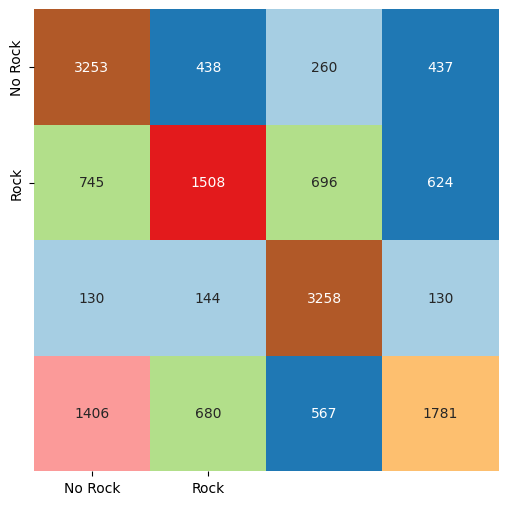

In [ ]:
cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['No Rock', 'Rock'], \
            yticklabels=['No Rock', 'Rock']);

##  Modelo de Clasificación KNN

In [ ]:
n_neighbors = 100
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", report)

Precisión: 0.5137323285794357
Reporte de clasificación:
               precision    recall  f1-score   support

     Country       0.56      0.44      0.49      4388
         Pop       0.36      0.57      0.44      3573
         Rap       0.78      0.68      0.73      3662
        Rock       0.47      0.40      0.44      4434

    accuracy                           0.51     16057
   macro avg       0.54      0.52      0.52     16057
weighted avg       0.54      0.51      0.52     16057



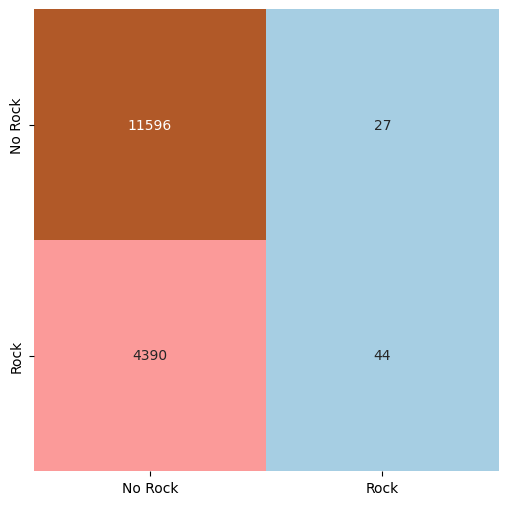

In [ ]:
cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['No Rock', 'Rock'], \
            yticklabels=['No Rock', 'Rock']);

# Modelo de Regresión Logística

In [ ]:
# Crear el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
# Ajustamos y entrenamos el modelo
log_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred = log_reg.predict(X_test)

report = classification_report(y_test, y_pred)
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", report)

Precisión: 0.7770442797533786
Reporte de clasificación:
               precision    recall  f1-score   support

     No-Rock       0.81      0.91      0.86     11623
        Rock       0.65      0.42      0.51      4434

    accuracy                           0.78     16057
   macro avg       0.73      0.67      0.68     16057
weighted avg       0.76      0.78      0.76     16057



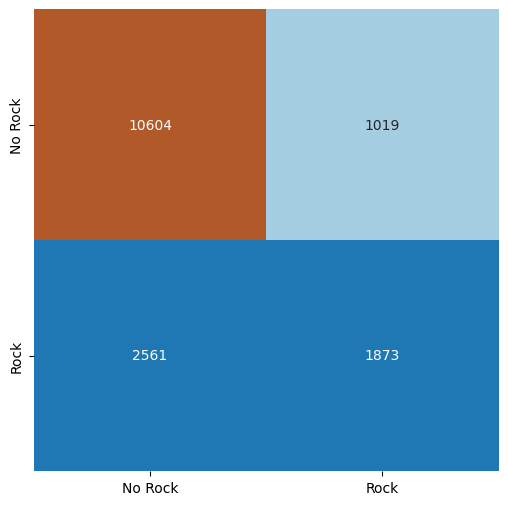

In [ ]:
cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['No Rock', 'Rock'], \
            yticklabels=['No Rock', 'Rock']);

# Perceptrón Multicapa

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


 - El porcentaje de acierto es del: 66.0%


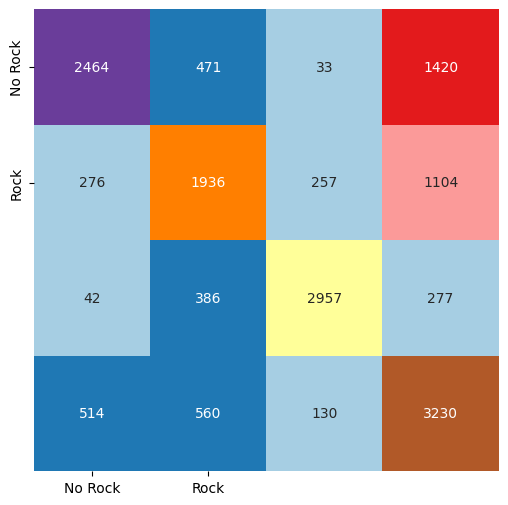

In [ ]:
# Creación del perceptron multicapa y ajuste de los datos

# Definimos la red colocando 3 capas, 5 iteracciones y definiendo un aprendizaje constante en el entrenamiento.

model = MLPClassifier(hidden_layer_sizes=3, max_iter=5, activation='relu', random_state=42, learning_rate='constant', learning_rate_init=0.05).fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas y visualizaciones
cm_bow = metrics.confusion_matrix(y_test, y_pred)

cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['No Rock', 'Rock'], \
            yticklabels=['No Rock', 'Rock']);

print(f' - El porcentaje de acierto es del: {np.round(metrics.accuracy_score(y_test, y_pred), 2) * 100}%')

# Predicción


Predicted Class: Rock
No Rock: 22.58%
Rock: 22.58%


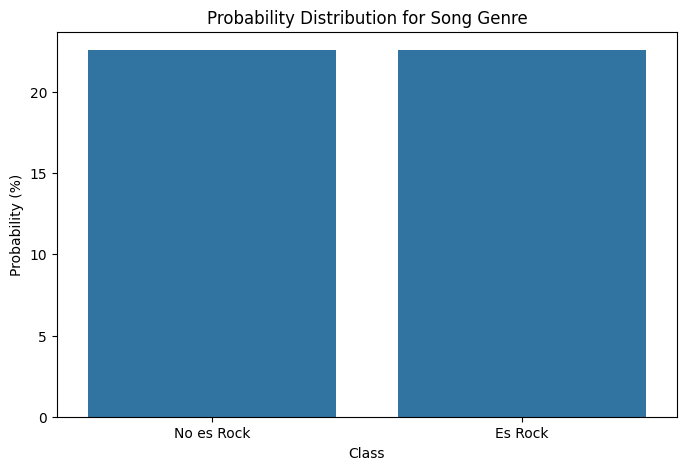

In [ ]:
def predict_class(lr):
    # Entrada de texto (letra de la canción)
    text = """I'm a goofy goober! ROCK!

"""
    # Convertimos el texto a minuscula para que todo se trate de la misma forma
    # y tokenizamos dicho texto una vez más, y se usa isalpha para que solo reconozca
    # los carácteres de la a-z y filtra para que no se incluyan las palabras de las
    # stop_words. Una vez tokenizados los volvemos a unir en una cadena completa.
    text = [' '.join([word for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words])]

    t_vectorized = vectorizer.transform(text).toarray()

    # Probabilidades

    # Calculamos la probabilidad del texto vectorizado específicamente y multiplicamos por 100 para que nos los muestre en formato de dos decimales.

    prob = lr.predict_proba(t_vectorized) * 100
    predicted_class = 'Rock' if prob[0][1] > prob[0][0] else 'No Rock'  # Compara las probabilidades directamente

    # Mostrar resultados
    print('\nPredicted Class:', predicted_class)
    print(f"No Rock: {prob[0][0]:.2f}%\nRock: {prob[0][1]:.2f}%")

    # Gráfica de probabilidades
    plt.figure(figsize=(8, 5))
    sns.barplot(x=['No es Rock', 'Es Rock'], y=[prob[0][0], prob[0][1]])
    plt.xlabel('Class')
    plt.ylabel('Probability (%)')
    plt.title('Probability Distribution for Song Genre')
    plt.show()

# Llamada a la función de predicción
predict_class(clasificador)